We are performing preprocessing along with some data visualization.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.isnull() ## FINDS THE NULL VALUES IN DATASET 

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum() ## for each coloumn the sum of null values is given.

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

## ANALYSIS ON NEW DATASET OF MISSING VALUES.

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
!pip install openpyxl

In [12]:
df=pd.read_excel('flight_price.xlsx')
df.head() ##gives first five records

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [13]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [14]:
df.notnull().sum()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [17]:
df_drop = df.dropna() ## drops the last coloumn value if axis not given with null values

In [16]:
df.rename(columns={'Date_of_Journey': 'Journey_day'}, inplace=True)

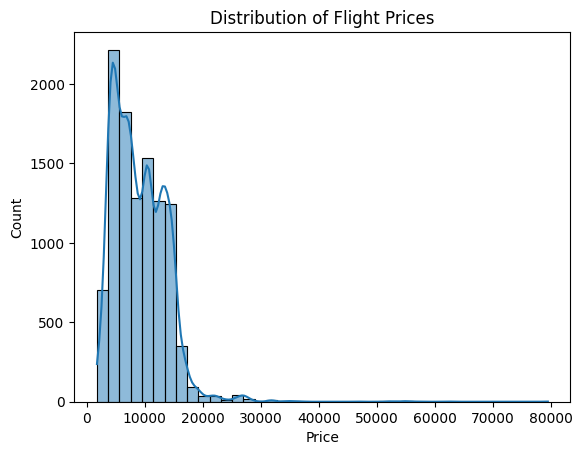

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
##See how ticket prices are spread.
sns.histplot(df['Price'], bins=40, kde=True)
plt.title("Distribution of Flight Prices")
plt.show()

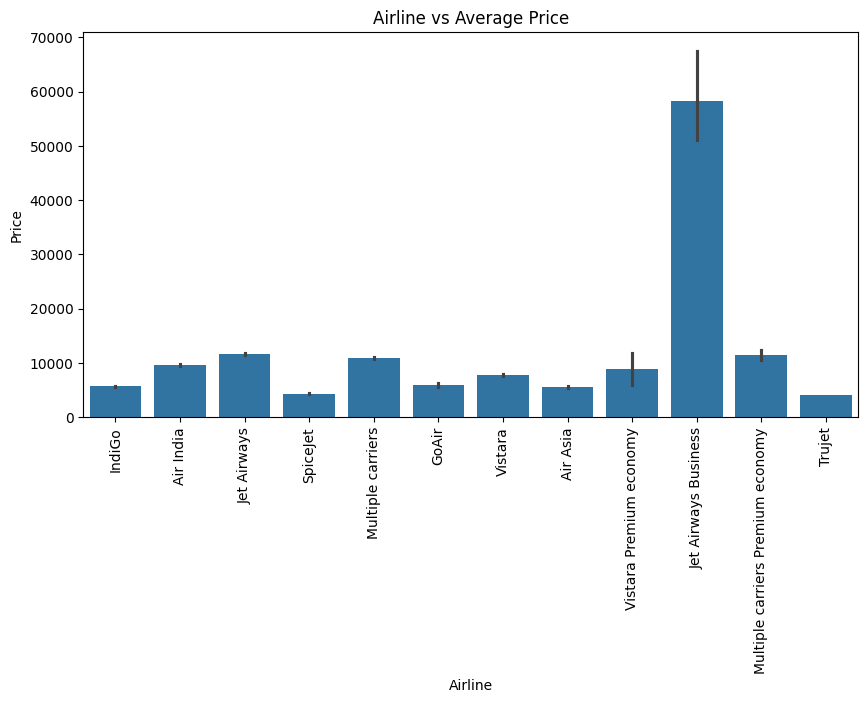

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x='Airline', y='Price', data=df)
plt.xticks(rotation=90)
plt.title("Airline vs Average Price")
plt.show() 
##Average Price by Airline

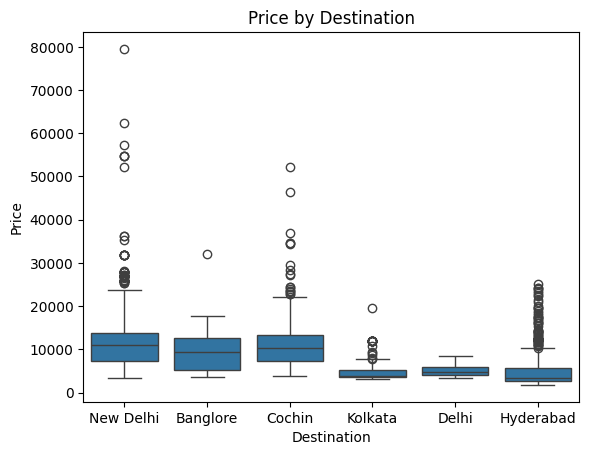

In [22]:
##Boxplot shows: median, spread, and outliers
sns.boxplot(x='Destination', y='Price', data=df)
plt.title("Price by Destination")
plt.show()

In [24]:
# Select numerical columns
num_df = df.select_dtypes(include=[np.number])

# Descriptive Statistics
mean = num_df.mean()
median = num_df.median()
mode = num_df.mode().iloc[0]
std_dev = num_df.std()
minimum = num_df.min()
maximum = num_df.max()
total_sum = num_df.sum()

# Quartiles & Percentiles
q1 = num_df.quantile(0.25)
q2 = num_df.quantile(0.50)
q3 = num_df.quantile(0.75)
p90 = num_df.quantile(0.90)

# Correlation & Covariance
correlation = num_df.corr()
covariance = num_df.cov()

# Combine results
stats_df = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Mode": mode,
    "Std Deviation": std_dev,
    "Min": minimum,
    "Max": maximum,
    "Sum": total_sum,
    "Q1 (25%)": q1,
    "Q2 (50%)": q2,
    "Q3 (75%)": q3,
    "90th Percentile": p90
})

print(stats_df)
print("\nCorrelation Matrix:\n", correlation)
print("\nCovariance Matrix:\n", covariance)


              Mean  Median   Mode  Std Deviation   Min    Max       Sum  \
Price  9087.064121  8372.0  10262    4611.359167  1759  79512  97077106   

       Q1 (25%)  Q2 (50%)  Q3 (75%)  90th Percentile  
Price    5277.0    8372.0   12373.0          14714.0  

Correlation Matrix:
        Price
Price    1.0

Covariance Matrix:
               Price
Price  2.126463e+07


In [27]:
## convert total stops to numbers
df['Total_Stops'] = df['Total_Stops'].replace({
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
})

/var/folders/16/1v52ws4140gbvxfmt0sf_01m0000gn/T/ipykernel_46824/2562730788.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Total_Stops'] = df['Total_Stops'].replace({


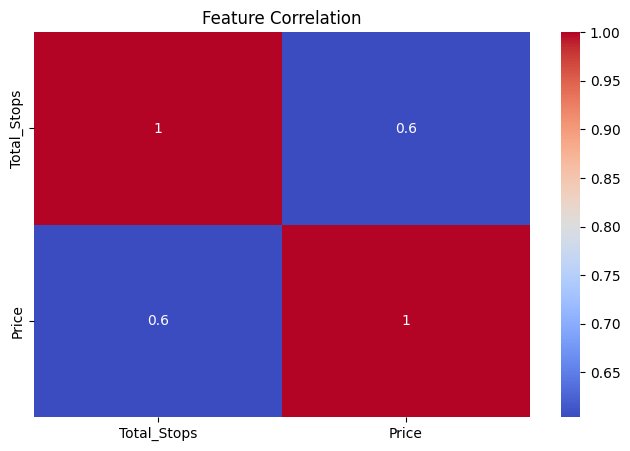

In [28]:
numeric_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()